Exploratory Data Analaytics

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns

In [51]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#missing data 

In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

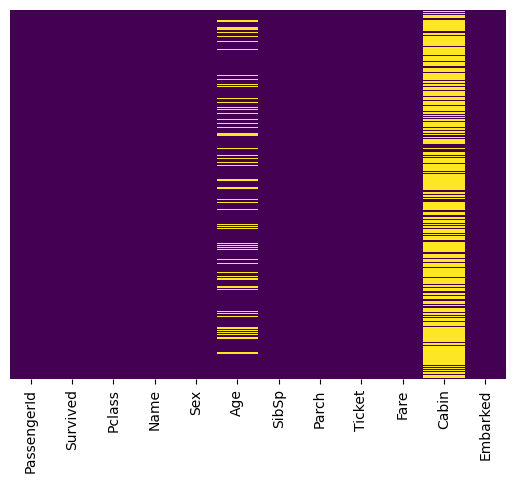

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
sns.set_style(style = 'whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

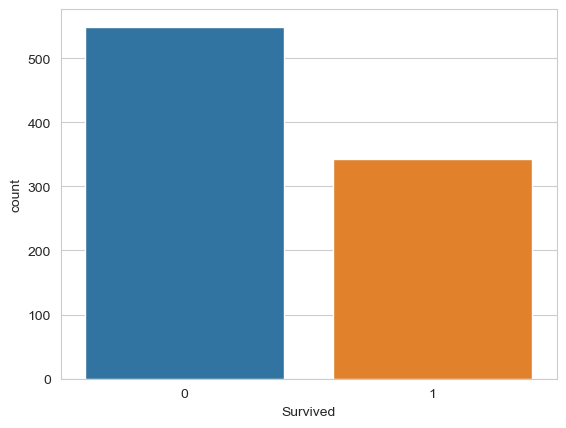

In [11]:
sns.countplot(x = 'Survived', data = train)

In [12]:
#can we differentitate how many males and females survived

<Axes: xlabel='Survived', ylabel='count'>

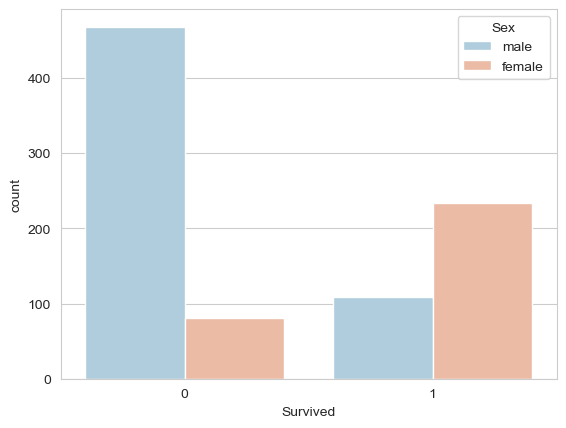

In [13]:
sns.set_style(style = 'whitegrid')
sns.countplot(x='Survived', hue='Sex',data = train, palette = 'RdBu_r')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

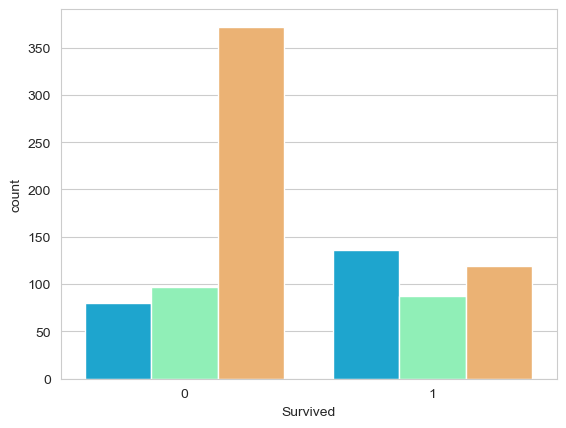

In [21]:
sns.set_style(style = 'whitegrid')
sns.countplot(x='Survived', hue='Pclass',data = train, palette = 'rainbow')

C:\Users\sriji\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


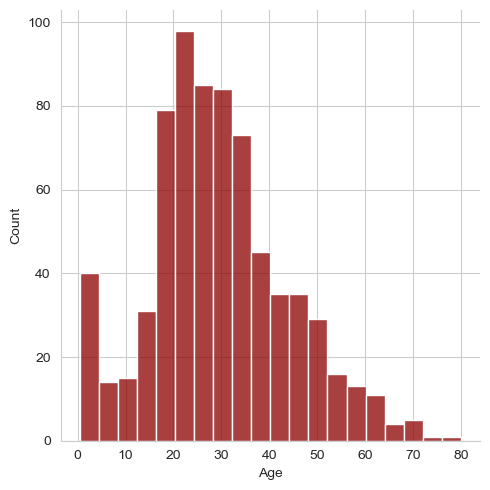

In [26]:
sns.displot(train['Age'].dropna(),kde= False,color= 'darkred', bins=20)

In [27]:
#what is the average age per class of cabin

<Axes: xlabel='Pclass', ylabel='Age'>

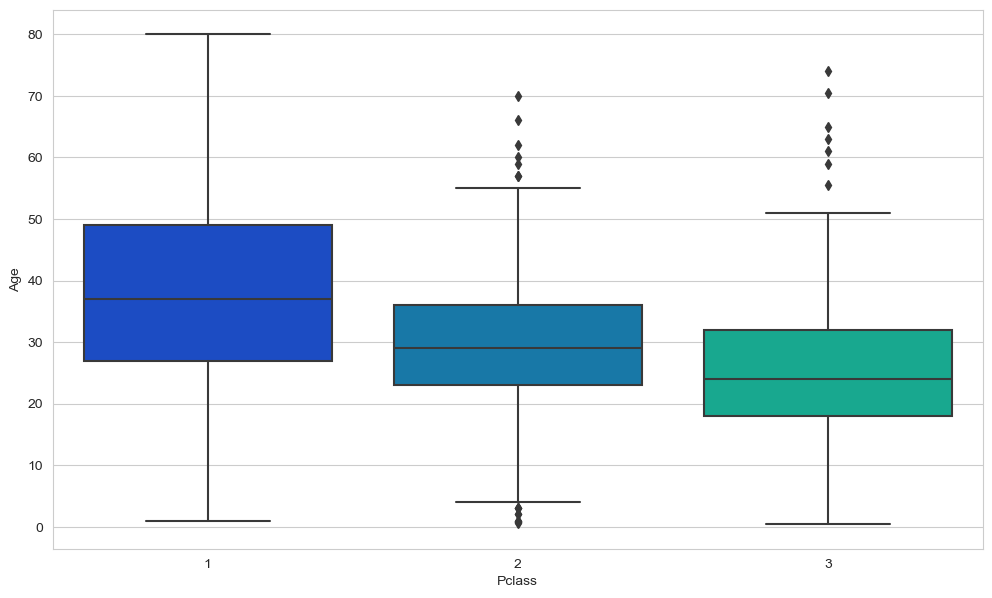

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
sns.boxplot(data = train,x='Pclass',y='Age', palette = 'winter')

In [54]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        if Pclass == 2:
            return 29

        else:
            return 24
    else:
        return Age



In [55]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

C:\Users\sriji\AppData\Local\Temp\ipykernel_27240\2711049327.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\sriji\AppData\Local\Temp\ipykernel_27240\2711049327.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

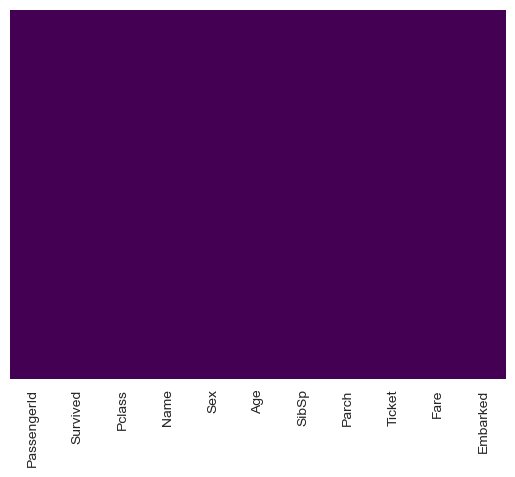

In [56]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [37]:
#see now age is completely filled

In [57]:
train.drop('Cabin',axis=1,inplace = True)

KeyError: "['Cabin'] not found in axis"

<Axes: >

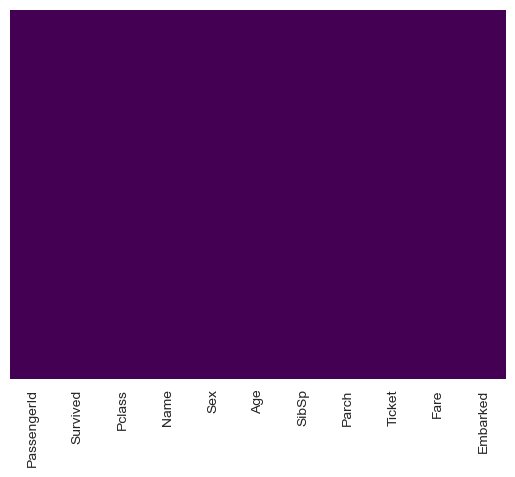

In [58]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [40]:
#Converting categorical values

In [59]:
embark = pd.get_dummies(train['Embarked'],drop_first = True, dtype = int)

In [60]:
sex = pd.get_dummies(train['Sex'], drop_first = True, dtype = int)

In [61]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [62]:
train.drop(['Sex','Embarked','Name','Ticket'], axis = 1, inplace = True)

In [63]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [64]:
train = pd.concat([train, sex, embark], axis = 1)

In [65]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [66]:
#now we have all numerical columns perfect to apply our machine elarning technique

In [67]:
#divide into dependent and independent features

TEST TRAIN SPLIT

In [68]:
train.drop('Survived', axis = 1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [69]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [70]:
X = train.drop('Survived', axis = 1)

In [71]:
y = train['Survived']

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [81]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
425,426,3,24.0,0,0,7.2500,1,0,1
799,800,3,30.0,1,1,24.1500,0,0,1
519,520,3,32.0,0,0,7.8958,1,0,1
405,406,2,34.0,1,0,21.0000,1,0,1
193,194,2,3.0,1,1,26.0000,1,0,1


In [75]:
model = LogisticRegression()

In [76]:
model.fit(X_train, y_train)

C:\Users\sriji\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
model.score(X_test, y_test)

0.7541899441340782

In [86]:
predictions = model.predict(X_test)

In [84]:
from sklearn.metrics import confusion_matrix

In [87]:
accuracy = confusion_matrix(y_test,predictions)

In [88]:
accuracy

array([[90, 14],
       [30, 45]], dtype=int64)

In [89]:
from sklearn.metrics import accuracy_score

In [90]:
accuracy = accuracy_score(y_test, predictions)

In [91]:
accuracy

0.7541899441340782

In [ ]:
#this is basic